In [13]:
import tensorflow as tf #>>>> usar python 3.6 0 menor (crear un nuevo envirroment)<<<<<<<

In [14]:
#Todo lo que se maneja en TensorFlow es en tensores (arreglos)

x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])
res = tf.mul(x1,x2)

In [15]:
#Para poder observar los resultados se tiene que inicar una sesion

with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [16]:
#Configuracion para Logs
config = tf.ConfigProto(log_device_placement = True)

# Caso:Señales de Transito

## Analisis de Datos

In [17]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np
import matplotlib.pyplot as plt
import random

In [18]:
#Metodo que carga las imagenes de un directorio

def load_ml_data(data_directory):
    
    #carpetas=carpetas dentro de data_directory
    #d=elemento dentro de data_directory
    carpetas = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = [] #nombres de carpetas
    images = []
    
    for name in carpetas:
        label_dir = os.path.join(data_directory, name)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(name))
        
    return images, labels

In [19]:
main_dir = "../python-ml-course/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [20]:
images, labels = load_ml_data(train_data_dir)

images = np.array(images) #Recordar que en TensorFlow todo son arreglos

labels = np.array(labels) #Recordar que en TensorFlow todo son arreglos

images.ndim #ancho de array

images.size #tamaño de array

4575

In [21]:
images[0] #pixeles de imagen 1 --> [R,G,B]

array([[[229, 254, 240],
        [236, 253, 244],
        [236, 250, 243],
        ..., 
        [255, 254, 255],
        [255, 253, 255],
        [255, 255, 255]],

       [[182, 241, 229],
        [224, 255, 255],
        [230, 250, 255],
        ..., 
        [255, 253, 255],
        [255, 253, 255],
        [255, 254, 255]],

       [[138, 226, 214],
        [200, 255, 255],
        [214, 242, 255],
        ..., 
        [255, 253, 255],
        [255, 253, 255],
        [255, 252, 254]],

       ..., 
       [[ 29,  48,  47],
        [ 28,  45,  33],
        [ 26,  42,  18],
        ..., 
        [ 67,  48,  36],
        [ 69,  49,  37],
        [ 70,  50,  39]],

       [[ 25,  38,  34],
        [ 24,  36,  28],
        [ 20,  32,  20],
        ..., 
        [ 65,  62,  43],
        [ 68,  63,  45],
        [ 67,  63,  46]],

       [[ 24,  30,  25],
        [ 21,  27,  24],
        [ 17,  24,  22],
        ..., 
        [ 55,  70,  46],
        [ 58,  70,  48],
        [ 57,  70,

In [22]:
unique_labels=set(labels) #numero de carpetas sin repetirse
len(set(labels))

62

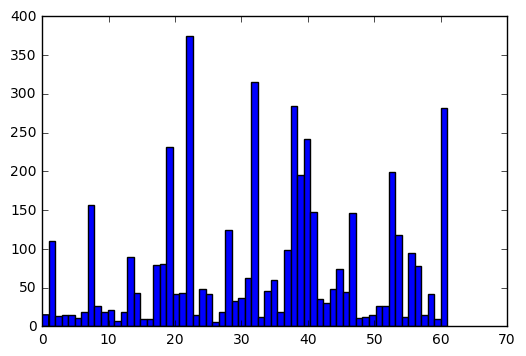

In [23]:
plt.hist(labels, len(set(labels)))
plt.show()

In [24]:
rand_signs = random.sample(range(0, len(labels)), 6) #escoger seis imagenes al azar
rand_signs

[3020, 2843, 812, 3420, 3387, 4138]

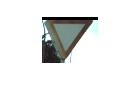

Forma:(135, 158, 3), min:0, max:255


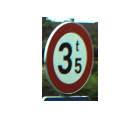

Forma:(172, 111, 3), min:0, max:255


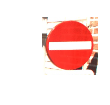

Forma:(195, 181, 3), min:6, max:255


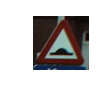

Forma:(91, 92, 3), min:0, max:200


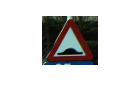

Forma:(110, 122, 3), min:0, max:255


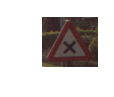

Forma:(104, 112, 3), min:21, max:171


In [25]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

*** Se concluye que las imagenes se tienen que estadarizar de tamaño ***

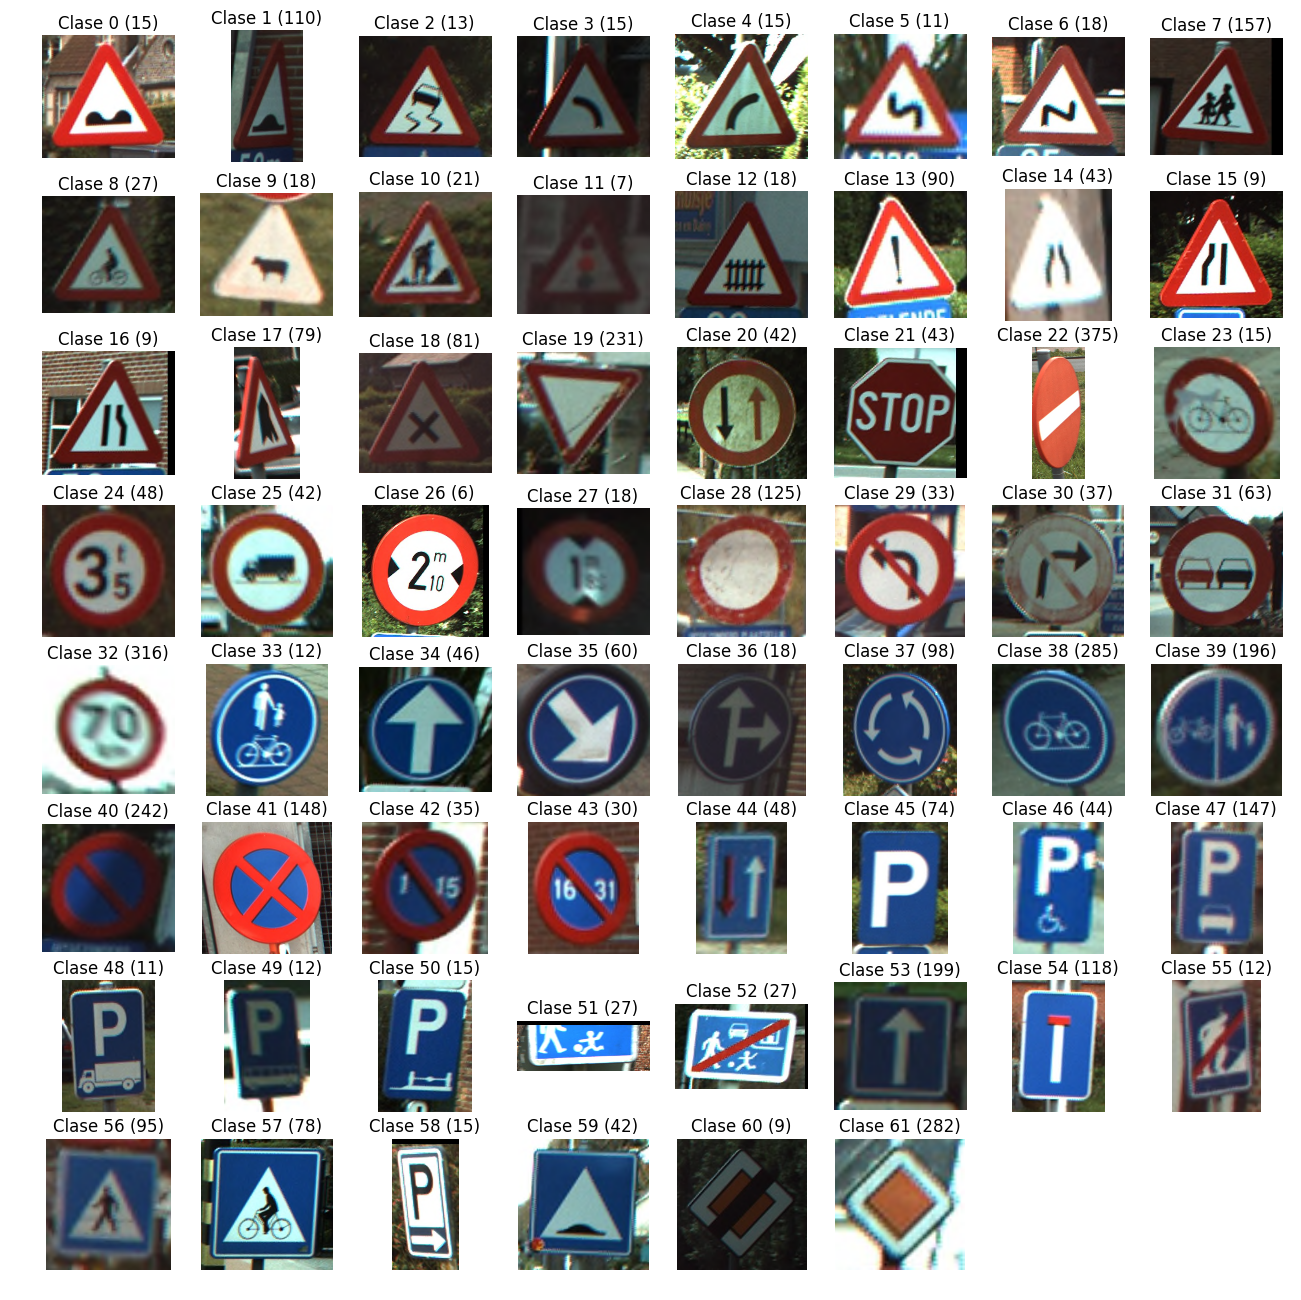

In [26]:
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [27]:
from skimage import transform

### Al ser imagenes de diferentes tamaños, se tiene que estandarizar uno (tamaño)

In [28]:
#Descubrir imagen mas pequeña

w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


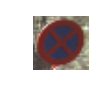

Forma:(30, 30, 3), min:0.12549019607843143, max:1.0


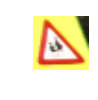

Forma:(30, 30, 3), min:0.03156862745098041, max:1.0


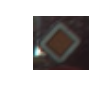

Forma:(30, 30, 3), min:0.08616122004357282, max:0.9999019607843137


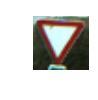

Forma:(30, 30, 3), min:0.03681917211328985, max:1.0


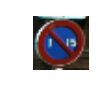

Forma:(30, 30, 3), min:0.0, max:1.0


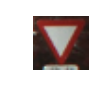

Forma:(30, 30, 3), min:0.060618736383442354, max:0.9600653594771237


In [29]:
images30 = [transform.resize(image, (30,30)) for image in images]

rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

### Una vez enstandarizado el tamaño, se pasa a escala de grises (los colores no son utiles en TensorFlow)

In [30]:
from skimage.color import rgb2gray

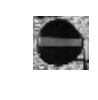

Forma:(30, 30), min:0.12426526535947736, max:0.9711120627450981


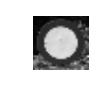

Forma:(30, 30), min:0.04668196078431374, max:0.7073200261437835


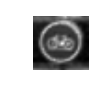

Forma:(30, 30), min:0.050392104575163445, max:0.6928659727668838


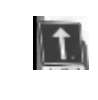

Forma:(30, 30), min:0.0, max:0.996815409150327


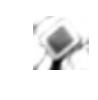

Forma:(30, 30), min:0.30065855337690645, max:1.0


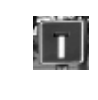

Forma:(30, 30), min:0.105420320261438, max:0.9867777777777778


In [31]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

## Creacion de Red Neuronal

In [32]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30]) #entrada del preceptron (siempre se hace un placeholder, que es solo un contenedor), shape recibira elementos de 30*30
y = tf.placeholder(dtype = tf.int32, shape = [None]) #salida de perceptron(placeholder, como solo es una salida shape=[None]

images_flat = tf.contrib.layers.flatten(x) #valores de entrada estandarizados (aplanados, listados e una dimension)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu) #conexion (logistica) de red neronal fully_conected(valores de entrada,valores de salida,capa neuronal)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits)) #funcion de perdida

train_opt = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss) # Funcion de entrenamiento

final_pred = tf.argmax(logits,1) #Funcion e prediccion (1 salida)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [ ]:
tf.set_random_seed(1234) #semilla para poder repoducir el mismo modelo

sess = tf.Session()

sess.run(tf.initialize_all_variables())

for i in range(601): #nmero de iteraciones (Ecpoh) para entrenar red neuronal
    
    _, accuracy_val = sess.run([train_opt, accuracy], #sess.run([funcion de entrenamiento,valor a predecir],datos de entrada y salida)
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
        #print("Fin del Ecpoh ", i)

## Evaluacion de la red Neuronal

In [54]:
test_images, test_labels = load_ml_data(test_data_dir)

test_images30 = [transform.resize(im,(30,30)) for im in test_images]

test_images30 = rgb2gray(np.array(test_images30))

prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [56]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
print('Del total de ',len(prediction),' muestras', match_count,' acertaron')

acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Del total de  2520  muestras 1427  acertaron
Eficacia de la red neuronal: 56.63


In [57]:
sample_idx = random.sample(range(len(test_images30)), 40)
sample_images = [test_images30[i] for i in sample_idx]
sample_labels = [test_labels[i] for i in sample_idx]

sample_prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]
sample_prediction

array([61, 32, 38,  7, 32, 22,  7, 38, 32, 38, 54, 61, 46, 61, 40,  7, 32,
        7, 32, 32, 18, 19, 38, 17, 32, 39, 54, 47, 32, 22, 17, 54, 56, 38,
       61, 32, 32, 38, 37, 32])

In [51]:
sample_labels

[32,
 56,
 32,
 38,
 28,
 19,
 20,
 32,
 35,
 59,
 31,
 28,
 32,
 19,
 17,
 32,
 32,
 61,
 18,
 17,
 35,
 32,
 38,
 38,
 31,
 1,
 32,
 38,
 39,
 32,
 32,
 17,
 24,
 32,
 54,
 22,
 21,
 32,
 53,
 19]

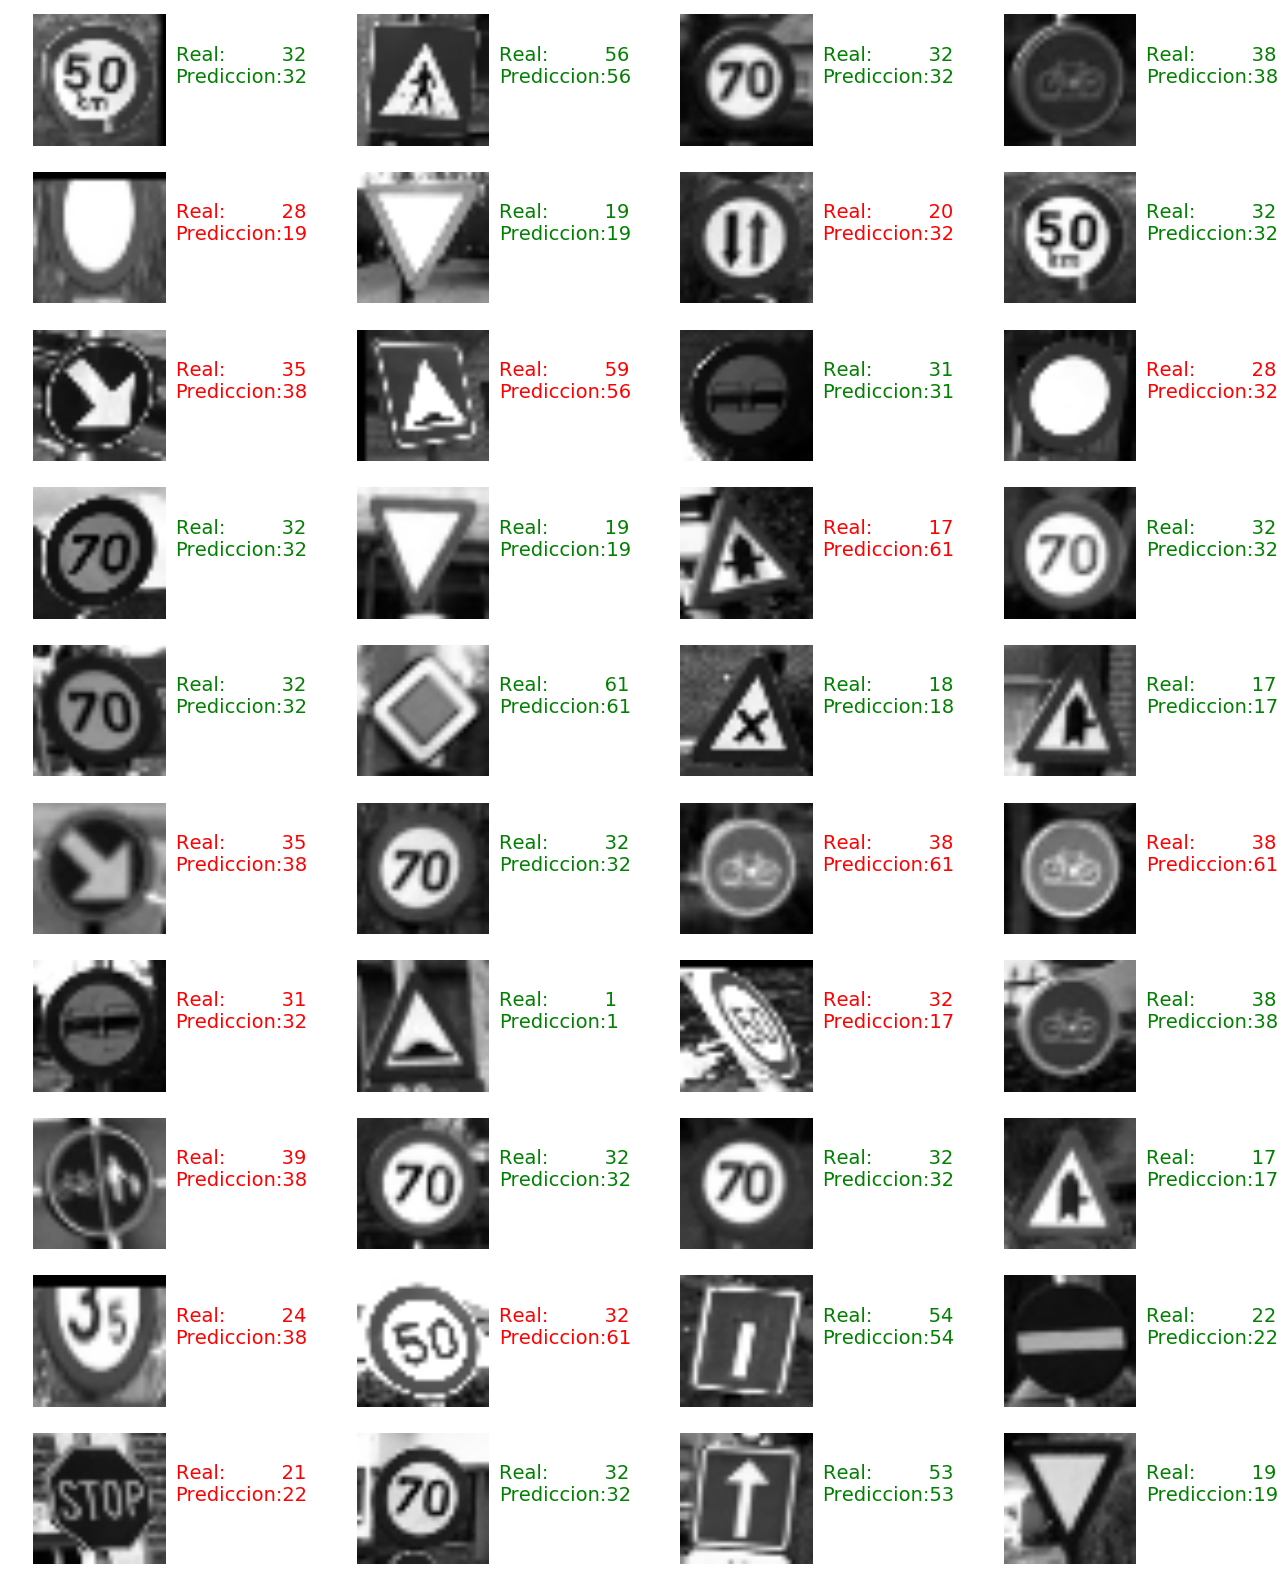

In [53]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = sample_prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()